<a href="https://colab.research.google.com/github/reypowgithub/Tugas_Visdat_TelU_2023/blob/main/Tugas_6_Week11_Reynhard_Powiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4L3 VISUALISASI DATA**

---

# Assignment Week-11

---

<p>Nama  = Reynhard Powiwi</p>
<p>NIM   = 1301204091</p>
<p>Kelas = IF-44-PIL-DS02 📚🎓</p>

---
* Buatlah visualisasi jaringan yang merepresentasikan jalur transportasi yang menghubungkan kota-kota besar di Jawa Barat atau jaringan dari suatu social network.
* Tentukan kota terpenting berdasarkan nilai degree centrality dan betweenness centrality.
* Update ukuran node berdasarkan nilai degree centrality

**Link Tambahan**
* [Dataset](https://github.com/efekarakus/potter-network/tree/master)
* [My Kaggle Project](https://www.kaggle.com/reypow/harry-potter-networks)

In [1]:
pip install python-louvain==0.15

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
from networkx.algorithms import community
import community
from google.colab import files
import zipfile
import os

In [3]:
# Upload Kaggle API key
uploaded = files.upload()

# Membuat direktori Kaggle dan memindahkan kaggle.json ke dalamnya
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset Herry Potter Character
!kaggle datasets download -d reypow/harrypottercharacter


# Ekstrak file zip GADM Indonesia
zip_ref = zipfile.ZipFile('harrypottercharacter.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
harrypottercharacter.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Read the Character file using pandas
characters = pd.read_csv("/content/characters.csv")
characters

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...
...,...,...,...
60,60,Fluffy,Three-headed dog belonging to Rubeus Hagrid.
61,61,Hedwig,Harry's owl.
62,62,Moaning Myrtle,Ghost at Hogwards.
63,63,Aragog,Acromantula belonging to Rubeus Hagrid.


In [5]:
# Extract nodes and character mapping
nodes = characters['id'].tolist()
mapping = dict(zip(characters['id'], characters['name']))

print('All nodes: ', nodes)
print('Character mapping: ', mapping)

All nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Character mapping:  {0: 'Regulus Arcturus Black', 1: 'Sirius Black', 2: 'Lavender Brown', 3: 'Cho Chang', 4: 'Vincent Crabbe Sr.', 5: 'Vincent Crabbe', 6: 'Bartemius "Barty" Crouch Sr.', 7: 'Bartemius "Barty" Crouch Jr.', 8: 'Fleur Delacour', 9: 'Cedric Diggory', 10: 'Alberforth Dumbledore', 11: 'Albus Dumbledore', 12: 'Dudley Dursley', 13: 'Petunia Dursley', 14: 'Vernon Dursley', 15: 'Argus Filch', 16: 'Seamus Finnigan', 17: 'Nicolas Flamel', 18: 'Cornelius Fudge', 19: 'Goyle Sr.', 20: 'Gregory Goyle', 21: 'Hermione Granger', 22: 'Rubeus Hagrid', 23: 'Igor Karkaroff', 24: 'Viktor Krum', 25: 'Bellatrix Lestrange', 26: 'Alice Longbottom', 27: 'Frank Longbottom', 28: 'Neville Longbottom', 29: 'Luna Lovegood', 30: 'Xenophilius Lov

In [6]:
# Read the Relationship file using pandas
relations = pd.read_csv("/content/relations.csv")
relations

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+
...,...,...,...
508,63,58,-
509,64,21,+
510,64,22,+
511,64,39,+


In [7]:
# Modify the 'type' column to binary values (1 for '+' and 0 for '-')
relations['type'] = relations['type'].apply(lambda x: 1 if x == '+' else 0)

# Extract edges
edges = [tuple(row) for row in relations.values]
edges = edges[1:]  # Skip the header

# Printing the edge pairs to the console
print('All edges: ', edges)

All edges:  [(0, 25, 0), (0, 45, 0), (1, 0, 0), (1, 11, 1), (1, 21, 1), (1, 25, 0), (1, 31, 1), (1, 33, 0), (1, 34, 0), (1, 36, 1), (1, 37, 1), (1, 38, 0), (1, 39, 1), (1, 40, 1), (1, 41, 1), (1, 45, 0), (1, 47, 0), (1, 48, 1), (1, 50, 1), (1, 53, 1), (1, 54, 1), (1, 55, 1), (1, 58, 1), (2, 21, 0), (2, 28, 1), (2, 58, 1), (3, 9, 1), (3, 16, 1), (3, 21, 1), (3, 28, 1), (3, 39, 1), (3, 45, 0), (3, 58, 1), (4, 0, 1), (4, 5, 1), (4, 6, 1), (4, 25, 1), (4, 33, 1), (4, 38, 1), (4, 45, 1), (4, 47, 1), (5, 4, 1), (5, 49, 1), (5, 20, 1), (5, 21, 0), (5, 32, 1), (5, 39, 0), (5, 58, 0), (6, 4, 1), (6, 7, 0), (6, 23, 1), (6, 57, 1), (7, 6, 0), (7, 21, 0), (7, 28, 1), (7, 36, 0), (7, 37, 0), (7, 39, 0), (7, 45, 1), (7, 47, 0), (7, 38, 1), (8, 21, 1), (8, 25, 0), (8, 28, 1), (8, 37, 1), (8, 39, 1), (8, 51, 1), (8, 55, 1), (8, 56, 1), (8, 58, 1), (9, 3, 1), (9, 39, 1), (9, 45, 0), (10, 11, 1), (10, 21, 1), (10, 39, 1), (10, 58, 1), (10, 59, 1), (11, 1, 1), (11, 10, 1), (11, 13, 0), (11, 14, 0), (11, 

In [8]:
# find the relationship groups
# find the edges that map positive i.e '+' relations
epos = [(u, v) for (u, v, d) in edges if d == 1]
print('Positive relationship edges : ', epos)
# find the edges that map negative i.e '-' relations
eneg = [(u, v) for (u, v, d) in edges if d == 0]
print('Negative relationship edges : ', eneg)

Positive relationship edges :  [(1, 11), (1, 21), (1, 31), (1, 36), (1, 37), (1, 39), (1, 40), (1, 41), (1, 48), (1, 50), (1, 53), (1, 54), (1, 55), (1, 58), (2, 28), (2, 58), (3, 9), (3, 16), (3, 21), (3, 28), (3, 39), (3, 58), (4, 0), (4, 5), (4, 6), (4, 25), (4, 33), (4, 38), (4, 45), (4, 47), (5, 4), (5, 49), (5, 20), (5, 32), (6, 4), (6, 23), (6, 57), (7, 28), (7, 45), (7, 38), (8, 21), (8, 28), (8, 37), (8, 39), (8, 51), (8, 55), (8, 56), (8, 58), (9, 3), (9, 39), (10, 11), (10, 21), (10, 39), (10, 58), (10, 59), (11, 1), (11, 10), (11, 21), (11, 22), (11, 31), (11, 36), (11, 36), (11, 37), (11, 39), (11, 40), (11, 41), (11, 47), (11, 50), (11, 51), (11, 52), (11, 53), (11, 54), (11, 55), (11, 56), (11, 57), (11, 58), (12, 12), (12, 14), (13, 12), (13, 13), (14, 12), (14, 13), (15, 11), (15, 47), (15, 49), (16, 2), (16, 3), (16, 21), (16, 28), (16, 29), (16, 39), (16, 55), (16, 58), (17, 11), (18, 33), (18, 49), (18, 57), (19, 4), (19, 20), (19, 45), (20, 19), (20, 5), (20, 32), 

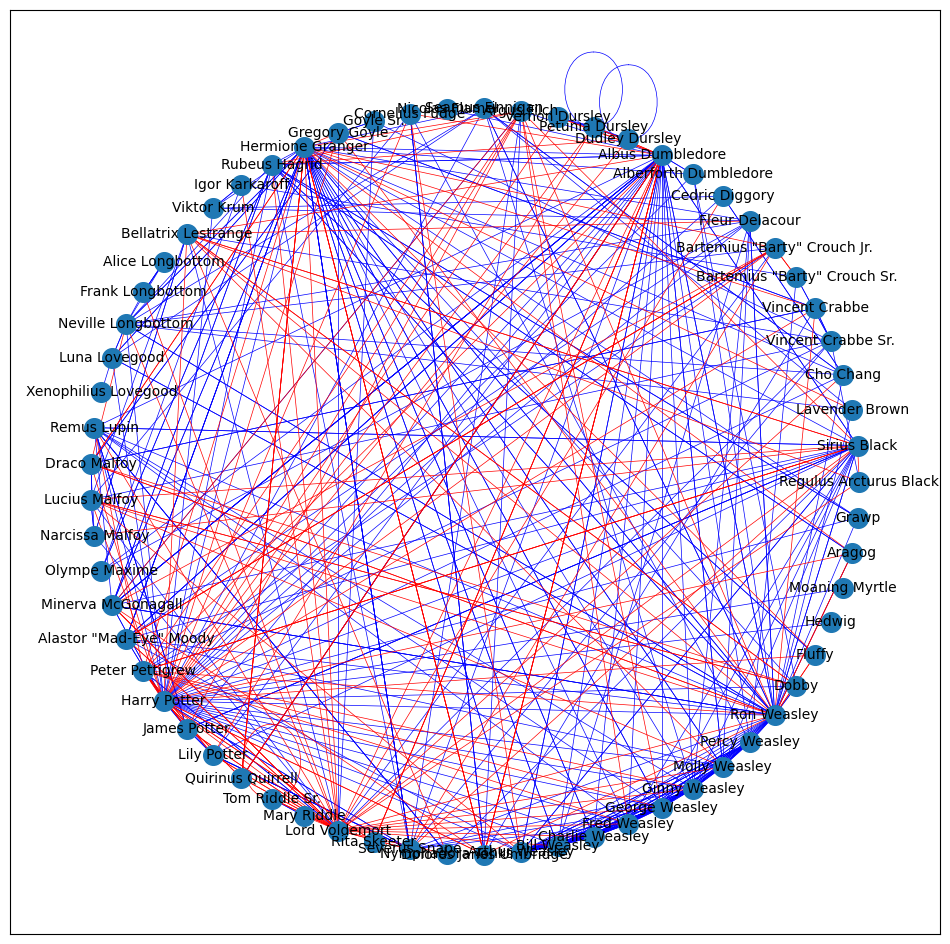

In [9]:
# construct the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# Draw the graph using the pyplot library
plt.figure(figsize=(12, 12))

# Draw the nodes
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=200)

# Draw the positive relationship edges in BLUE
nx.draw_networkx_edges(G, pos, edgelist=epos, edge_color='b', width=0.5)

# Draw the negative relationship edges in RED
nx.draw_networkx_edges(G, pos, edgelist=eneg, edge_color='r', width=0.5)

# Add the character names from the mapping as labels
nx.draw_networkx_labels(G, pos, labels=mapping, font_size=10, font_family='sans-serif')

# Display the plot
plt.show()

Number of nodes: 65
Number of edges: 333
Average degree: 10.246153846153845
Maximum degree: 48
Degree centrality (max): 0.75
Betweenness centrality (max): 0.28194042928218666


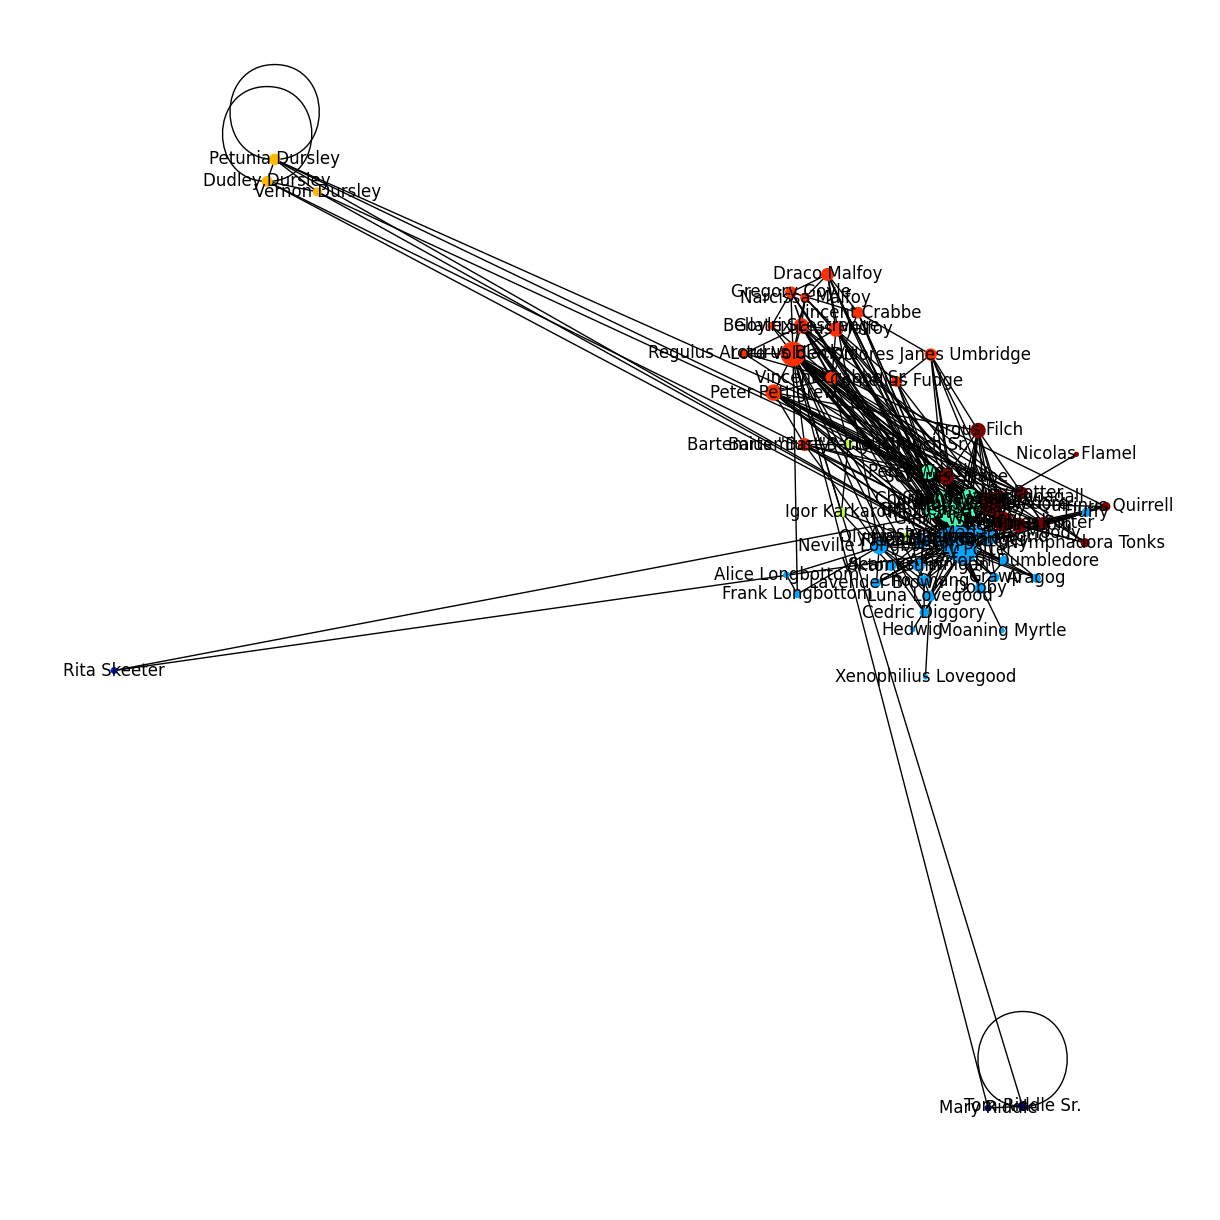

In [11]:
# Information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
print("Maximum degree:", max(dict(G.degree()).values()))

# Degree centrality
degree_centrality = nx.degree_centrality(G)
max_degree_centrality_node = max(degree_centrality, key=degree_centrality.get)
print('Degree centrality (max):', degree_centrality[max_degree_centrality_node])

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
max_betweenness_centrality_node = max(betweenness_centrality, key=betweenness_centrality.get)
print('Betweenness centrality (max):', betweenness_centrality[max_betweenness_centrality_node])

# Update node size based on degree centrality
node_size = [500 * degree_centrality[node] for node in G.nodes]

# Relabel the graph for simplicity
H = nx.relabel_nodes(G, mapping)

# Finding communities using the community module
part = community.best_partition(H)
values = [part.get(node) for node in H.nodes()]

# Draw the graph with updated node size
plt.figure(figsize=(12, 12))
nx.draw(H, cmap=plt.get_cmap('jet'), node_color=values, node_size=node_size, with_labels=True)
plt.show()